In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('https://openmv.net/file/room-temperature.csv')
data.describe()
data

,Date,FrontLeft,FrontRight,BackLeft,BackRight
0,4/11/2010 11:30,295.2,297.0,295.8,296.3
1,4/11/2010 12:00,296.2,296.4,296.2,296.3
2,4/11/2010 12:30,297.3,297.5,296.7,297.1
3,4/11/2010 13:00,295.9,296.7,297.4,297.0
4,4/11/2010 13:30,297.2,296.5,297.6,297.4
...,...,...,...,...,...
139,4/14/2010 9:00,295.8,294.6,294.8,295.7
140,4/14/2010 9:30,294.8,295.5,294.7,295.6
141,4/14/2010 10:00,295.9,295.8,295.5,295.2
142,4/14/2010 10:30,295.1,296.2,296.0,296.1


In [2]:
data.corr()

,FrontLeft,FrontRight,BackLeft,BackRight
FrontLeft,1.000000,0.852476,0.558337,0.605670
FrontRight,0.852476,1.000000,0.587676,0.639096
BackLeft,0.558337,0.587676,1.000000,0.884019
BackRight,0.605670,0.639096,0.884019,1.000000


In [3]:
A = data.to_numpy()[:,1:].astype(np.float64)
Anorm = A -  np.mean(A,axis=0)[None,:]
Anorm.shape

(144, 4)

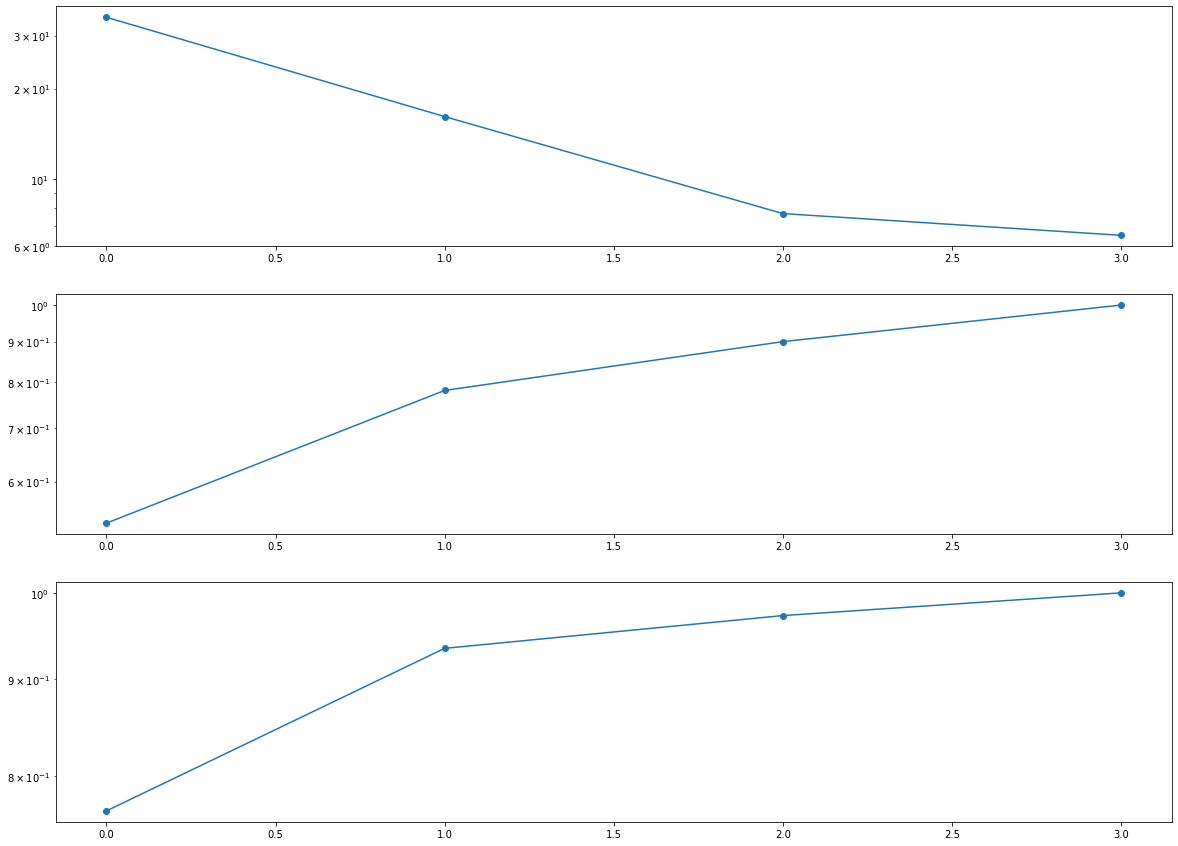

In [4]:
U,s,VT = np.linalg.svd(Anorm,full_matrices=False)

fig, axs = plt.subplots(3,1, figsize=(20,15))
axs = axs.flatten()
axs[0].semilogy(s, 'o-')
axs[1].semilogy(np.cumsum(s)/np.sum(s), 'o-')
axs[2].semilogy(np.cumsum(s**2)/np.sum(s**2), 'o-')

In [5]:
U.shape, s.shape, VT.shape, A.T.shape

((144, 4), (4,), (4, 4), (4, 144))

In [6]:
Phi = Anorm @ VT.T
Phi.shape

(144, 4)

array([-589.38131294, -630.27244818, -560.61974601, -604.18717528])

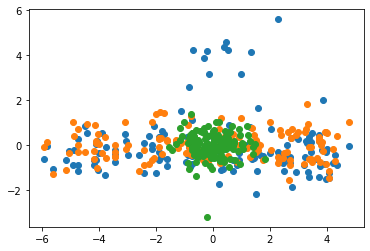

In [8]:
pc1 = Phi[:,0]
pc2 = Phi[:,1]
pc3 = Phi[:,2]
pc4 = Phi[:,3]

plt.scatter(pc1, pc2)
plt.scatter(pc1, pc3)
plt.scatter(pc3, pc4)

A.T@pc1

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

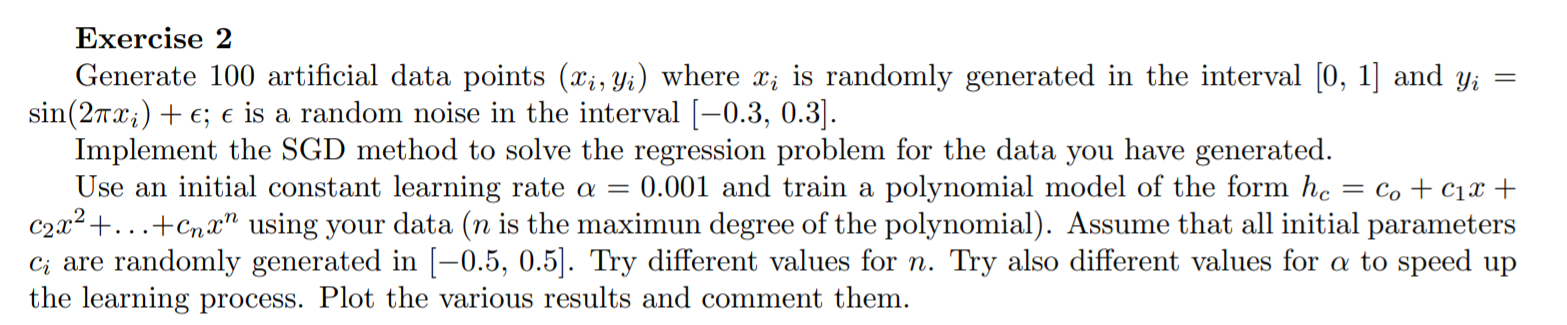

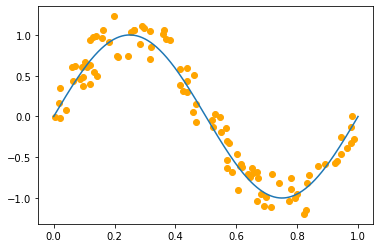

In [74]:
m=100
np.random.seed(0)
x = np.random.rand(m)
f = lambda x: np.sin(2*np.pi*x)
eps = ((np.random.rand(m)*2)-1)*.3
y_ex = f(x)
y = y_ex + eps


x_fine = np.linspace(0,1,1000)
plt.plot(x_fine, f(x_fine))
plt.scatter(x,y,color='orange')


In [75]:
def model(x,params):
  return sum([params[i]*x**i for i in range(len(params))])

#x = np.ones(4)*2
#params = np.array([1,2,3])
#model(x,params)

In [76]:
def loss(x,y,params):
  return jnp.mean((y-model(x,params))**2)

n=50
params = ((np.random.rand(n)*2)-1)*.5
loss(x,y,params)

DeviceArray(0.5051613, dtype=float32)

RMSE: 0.247


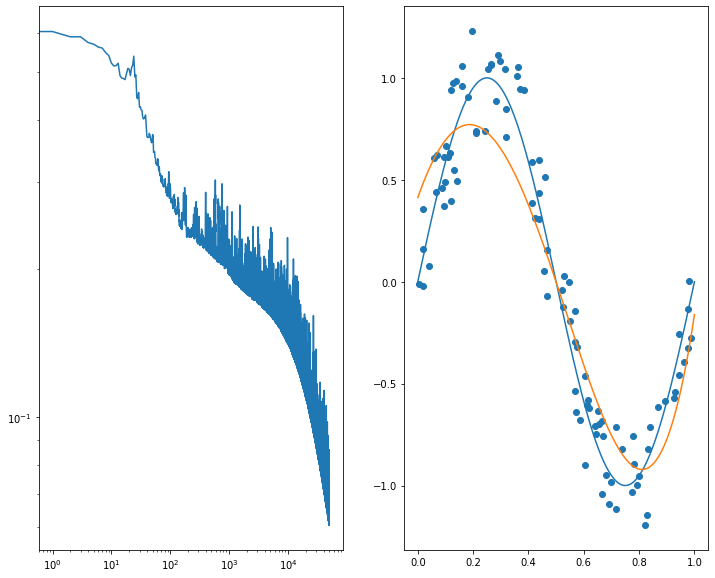

In [87]:
lr=3e-2
n=5 # number of parameters(coefficient)
params = ((np.random.rand(n)*2)-1)*.5
num_epochs = 50000
batch_size = 1

grad_jit = jax.jit(jax.grad(loss, argnums= 2))
loss_jit = jax.jit(loss)

hist = [loss(x,y,params)]

for epoch in range(num_epochs):
  mini_batch = np.random.choice(m)
  params -= lr*grad_jit(x[mini_batch],y[mini_batch],params)
  hist.append(loss_jit(x, y, params))

print("RMSE: %1.3f" % jnp.sqrt(hist[-1]))

fig, axs = plt.subplots(1, 2, figsize=(12,10))
axs[0].loglog(hist)
axs[1].plot(x_fine, f(x_fine))
axs[1].scatter(x,y)
axs[1].plot(x_fine, model(x_fine,params))

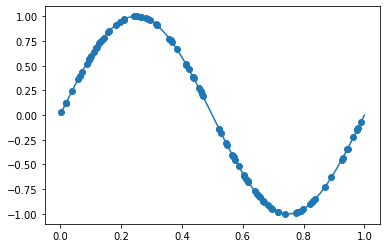

In [65]:
x_fine = np.linspace(0,1,1000)
plt.plot(x_fine, np.sin(2*np.pi*x_fine))
plt.scatter(x,y)

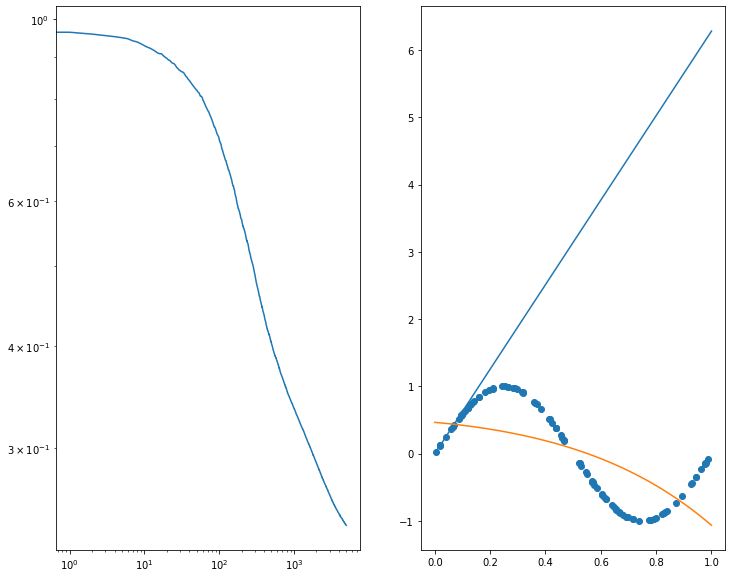

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(12,10))
axs[0].loglog(hist)
axs[1].plot(x_fine, 2*np.pi*x_fine)
axs[1].scatter(x,y)
axs[1].plot(x_fine, model(x_fine,params))